**Custom Dense Layer (with Activation)**

In [136]:
import tensorflow as tf
from tensorflow.keras import backend as K
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

class SimpleDense(tf.keras.layers.Layer):

  #Constructor has to call the parent constructor. 
  def __init__(self, units, activation=None, **kwargs): # this will allow for passing the parameters that parent class takes, e.g., name
    super(SimpleDense, self).__init__(**kwargs)
    self.units = units 
    self.activation  = tf.keras.activations.get(activation)

  #housekeeping to get the layer going. Initializing the variables.
  def build(self, input_shape):
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(initial_value = w_init(shape= (input_shape[-1], self.units)), name="kernel", trainable=True, dtype="float32")
    b_init = tf.zeros_initializer()
    self.b = tf.Variable(initial_value = b_init(shape= (self.units,)), name="bias", trainable=True, dtype="float32")

  #forward pass function.
  def call(self, inputs): 
    return self.activation(tf.matmul(inputs, self.w) + self.b) # applies the activation function to the Z.  

**Custom Flatten Layer**

**I'll use this custom SimpleDense layer on Fashion MNIST Classification**

In [ ]:
(x_train, y_yrain) , (x_valid, y_valid) = tf.keras.datasets.mnist.load_data() 
x_train, x_valid = x_train / 255., x_valid/255. 

**Since this custom layer can't take an activation yet, I will use my custom relu wrapped in a lambda layer.**

In [132]:
#Note that I'm using the keras backend's maximum function so that the function is differentiable by TF.
def my_relu(x):
  return K.maximum(0.0, x)

In [139]:
# #Define the model (doing in Functional API just for the fun of it and practice.) 
# from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, Lambda
# input_layer = Input(shape=(28,28), name="input_layer")
# flatten = Flatten(name="flatten")(input_layer)
# dense1  = SimpleDense(units=128, name = "custom_dense1")(flatten) # my_own custom layer!! proud daddy :) 
# relu_layer1 = Lambda(my_relu)(dense1) # again, my custom relu function. using it in a lambda here because custom dense does not yet take an activation.
# dropout1 = Dropout(0.2)(relu_layer1) 
# dense2 = SimpleDense(128, name="custom_dense2")(dropout1)
# relu_layer2 = Lambda(my_relu)(dense2)
# dropout2 = Dropout(0.2)(relu_layer2)
# out = Dense(10, activation="softmax")(dropout2)


#Using the Ver2 of the Custom Dense layer, now with the activation built in. 
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, Lambda
input_layer = Input(shape=(28,28), name="input_layer")
flatten = Flatten(name="flatten")(input_layer)
dense1  = SimpleDense(units=128, activation="relu", name = "custom_dense1")(flatten) # my_own custom layer!! proud daddy :) 
dropout1 = Dropout(0.2)(dense1) 
dense2 = SimpleDense(128, activation = "relu", name="custom_dense2")(dropout1)
dropout2 = Dropout(0.2)(dense2)
out = Dense(10, activation="softmax")(dropout2)


model = tf.keras.Model(inputs= input_layer, outputs = out)
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics = "acc") 



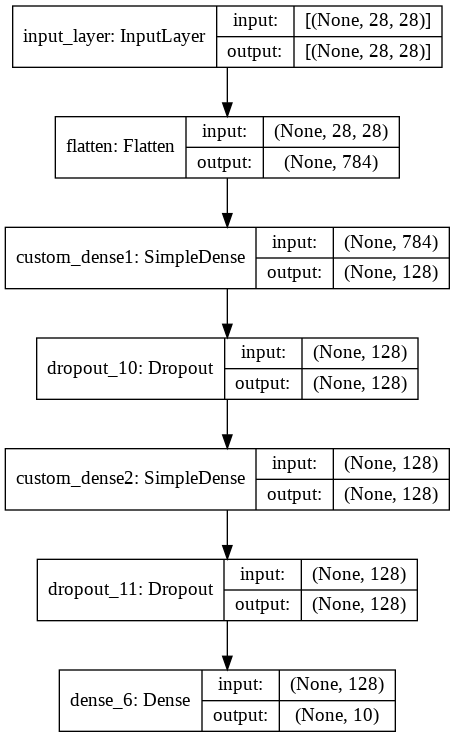

In [140]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [142]:
history = model.fit(x_train, y_train, validation_data = (x_valid, y_valid), epochs=20, batch_size=32)

#plotting loss curves. 
pd.DataFrame(history.history).plot(figsize=(8,6))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3520 - acc: 0.5917 - val_loss: 0.3641 - val_acc: 0.8984
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4409 - acc: 0.8682 - val_loss: 0.2763 - val_acc: 0.9201
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3473 - acc: 0.8987 - val_loss: 0.2319 - val_acc: 0.9322
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2870 - acc: 0.9152 - val_loss: 0.2007 - val_acc: 0.9396
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2570 - acc: 0.9257 - val_loss: 0.1771 - val_acc: 0.9475
Epoch 6/20
 107/1875 [>.............................] - ETA: 3s - loss: 0.2260 - acc: 0.9352

KeyboardInterrupt: ignored